__Idenficador:__ TPC7  
__Título do Trabalho:__ Trabalhar com Bases de Dados    
__Data de ínicio:__ 2021-11-22   
__Data do Fim:__ 2021-11-28   
__Supervisor:__ José Carlos Ramalho  
__Autor:__ Luís Manuel Mendonça Gonçalves A95637  


__Resumo:__   
Neste trabalho foi pedido que fosse desenvolvido as capacidades de trabalhar com Bases de Dados.  
Estas Bases de Dados baseias-se num dicionario onde na chave _tpc_, seria uma lista das notas dos diferentes Tpc dos alunos.  
Nestes exercicios foram pedidos para fazer leitura da base de dados, leitura de dados de um aluno em especifico e distruibuições por notas e por cursos e suas especificas representações gráficas

## Dataset

Para a resoluÃ§Ã£o dos exercÃ­cios desta ficha, descarrega o dataset de alunos do site da UC.

### Estrutura do dataset
O dataset tem a seguinte estrutura:

```
id_aluno,nome,curso,tpc1,tpc2,tpc3,tpc4
"a1","Aysha Melanie Gilberto","LEI",12,8,19,8
"a2","Igor AndrÃ© Cantanhede","ENGFIS",12,16,18,20
"a3","LaurÃ©nio Narciso","ENGFIS",8,14,15,14
"a4","Jasnoor Casegas","LCC",14,20,17,11
"a5","Tawseef RebouÃ§as","ENGBIOM",13,14,13,17
"a6","Eryk Clementino","LEI",10,19,11,14
...
```

## Leitura (exercÃ­cio 1)

Depois de pensares num modelo adequado especifica a funÃ§Ã£o que lÃª o ficheiro e povoa esse modelo.

In [130]:
import os
print(os.getcwd())

c:\Users\Luís Gonçalves\OneDrive\Ambiente de Trabalho\Programação\T6


In [131]:
# Descreve em texto o teu modelo
#
# BDAlunos = [Aluno]
# Aluno = {id: "...", nome: "...", curso: "...", tpc: [int]}
#
# Leitura/carregamento da informaÃ§Ã£o do ficheiro
def lerDataset(fnome):
    bd = []
    f = open( fnome, encoding='utf-8')
    f.readline()
    for linha in f:
        linha2=linha.replace('"',"")
        novaLinha = linha2.replace("\n","")
        campos = novaLinha.split(",")
        aluno = {}
        aluno['id'] = campos[0]
        aluno['nome'] = campos[1]
        aluno['curso'] = campos[2]
        listaTPC = []
        for tpc in campos[3:]:
            listaTPC.append(int(tpc))
        aluno['tpc'] = listaTPC
        bd.append(aluno)
    return bd

In [132]:
BDalunos = lerDataset("alunos.csv")
# print(BDalunos)

## Listagem (exercÃ­cio 2)

Especifica uma funÃ§Ã£o que faÃ§a a listagem no monitor dos vÃ¡rios registos de informaÃ§Ã£o.
Tenta dar a forma duma tabela em que as colunas tÃªm todas a mesma dimensÃ£o.

In [133]:
# Listagem da informaÃ§Ã£o
def listarDataset(bd):
    print("id     |nome               |curso      | média")
    print("----------------------------------------------")
    for a in bd:
        print(a['id']+' | '+a['nome']+' | '+a['curso']
                +' | '+str(sum(a['tpc'])/len(a['tpc'])))

In [134]:
listarDataset(BDalunos)

id     |nome               |curso      | média
----------------------------------------------
a1 | Aysha Melanie Gilberto | LEI | 11.75
a2 | Igor André Cantanhede | ENGFIS | 16.5
a3 | Laurénio Narciso | ENGFIS | 12.75
a4 | Jasnoor Casegas | LCC | 15.5
a5 | Tawseef Rebouças | ENGBIOM | 14.25
a6 | Eryk Clementino | LEI | 13.5
a7 | Ianna Noivo | ENGBIOM | 15.75
a8 | Ayla Thaissa Reina | ENGBIOM | 11.5
a9 | Cássia Viviane Coitã | ENGFIS | 13.0
a10 | Koby Vindima | LEI | 14.0
a11 | Gustavo Martim Hernandez | ENGBIOM | 11.0
a12 | Siddarta Beiriz | LEI | 14.75
a13 | Daniela Patrícia Montes | ENGBIOM | 16.75
a14 | Kaylla Pessego | LCC | 14.0
a15 | Bianca Cristina Primitivo | ENGBIOM | 13.25
a16 | Magna Galhardo | ENGFIS | 15.25
a17 | Grace Isabel Patriarca | LCC | 12.75
a18 | Saubhagya Buco | LEI | 15.25
a19 | Ivo Vicente Boisa | ENGBIOM | 13.75
a20 | Vivaan Castilhos | ENGFIS | 13.0
a21 | Layana Camejo | ENGFIS | 14.75
a22 | Mahdi Menoita | ENGFIS | 12.75
a23 | Yifan Cortinado | LEI | 15.25
a

## Consulta de um registo (exercÃ­cio 3)

Especifica uma funÃ§Ã£o que, dado o id de um aluno, coloca a sua informaÃ§Ã£o no monitor. Para alÃ©m disso, indica tambÃ©m a mÃ©dia dos TPC realizados.

In [135]:
# Consulta de um registo
def consultarDataset(bd, id):
    for a in bd:
        if a["id"]==id:
             print(a['id']+' | '+a['nome']+' | '+a['curso']
                +' | '+str(sum(a['tpc'])/len(a['tpc'])))

#Por exemplo 
consultarDataset(BDalunos, 'a100')

a100 | Tude Searas | LEI | 14.75


## Top 10 (exercÃ­cio 4)

Especifica um funÃ§Ã£o que dÃ¡ como resultado uma lista com os alunos com as 10 mÃ©dias mais altas: id, nome, curso, mÃ©dia.

In [136]:
def org(resultados):
    c,d=resultados.split("|")
    return float(d)
def top10(bd):
    resultados = [str(str(a["id"]))+"|"+(str(sum(a['tpc'])/len(a['tpc']))) for a in bd]
    resultados.sort(reverse=True, key=org)
    print("""id     |nome               |curso      | média)
----------------------------------------------""")
    
    for i in resultados[:10]:
        c,d=i.split("|")
        consultarDataset(BDalunos,c)
top10(BDalunos[1:])

id     |nome               |curso      | média)
----------------------------------------------
a47 | Moisés João Cornelio | LEI | 18.0
a80 | Maria Carolina Josué | ENGFIS | 18.0
a32 | Ariane Sofia Foja | LEI | 17.5
a74 | Vânia Sofia Porfirio | ENGBIOM | 17.5
a56 | Hakeem Brazão | LEI | 17.25
a84 | Laudário Frasão | LCC | 17.0
a13 | Daniela Patrícia Montes | ENGBIOM | 16.75
a41 | Lachezar Rosas | ENGBIOM | 16.75
a45 | Imayame Hespanha | ENGFIS | 16.75
a2 | Igor André Cantanhede | ENGFIS | 16.5


## DistribuiÃ§Ã£o por curso (exercÃ­cio 5)

Especifica uma funÃ§Ã£o que dÃ¡ como resultado uma lista de pares indicando quantos alunos hÃ¡ em cada curso.

In [137]:
def distribPorCurso(bd):
    distribuicao = {}
    for a in bd:
        if a['curso'] in distribuicao.keys():
            distribuicao[a['curso']] = distribuicao[a['curso']] +1
        else:
            distribuicao[a['curso']] = 1
    return distribuicao

In [138]:
mydistrib = distribPorCurso(BDalunos)
print(mydistrib)

{'LEI': 23, 'ENGFIS': 32, 'LCC': 20, 'ENGBIOM': 25}


## DistribuiÃ§Ã£o por mÃ©dias (exercÃ­cio 6)

Especifica uma funÃ§Ã£o que dÃ¡ como resultado uma lista de pares, mÃ©dia e nÃºmero de alunos com essa mÃ©dia (considera o valor inteiro da mÃ©dia).

In [139]:
def distribPorMedia(d):
    distribuicao2 = {}
    for a in d:
        if ((int(sum(a['tpc'])/len(a['tpc'])))) in distribuicao2.keys():
            distribuicao2[(int(sum(a['tpc'])/len(a['tpc'])))] = distribuicao2[(int(sum(a['tpc'])/len(a['tpc'])))] +1
        else:
            distribuicao2[((int(sum(a['tpc'])/len(a['tpc']))))]=1    
    return distribuicao2
x=distribPorMedia(BDalunos)
for (key) in sorted(x):
        print (str(key)+ " : " + str(x[key]))

9 : 2
10 : 1
11 : 9
12 : 15
13 : 20
14 : 21
15 : 15
16 : 11
17 : 4
18 : 2


# GrÃ¡ficos

## GrÃ¡fico da distribuiÃ§Ã£o por curso (exercÃ­cio 7)

Especifica uma funÃ§Ã£o que faz o plot dum grÃ¡fico com a distribuiÃ§Ã£o de alunos por curso.

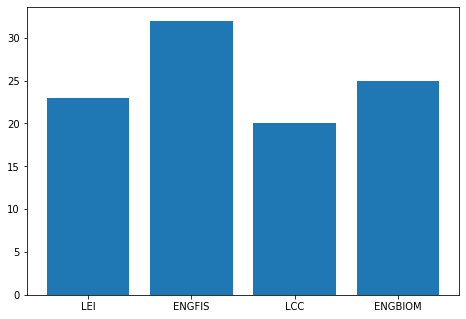

In [140]:
import matplotlib.pyplot as plt
def plotDistribPorCurso(distribuicao):
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    Curso=[]
    dist=[]
    for linha in distribuicao:
            Curso.append(linha)
            dist.append(distribuicao[linha])
    ax.bar(Curso,dist)
    plt.show()
plotDistribPorCurso(distribPorCurso(BDalunos))

## GrÃ¡fico da distribuiÃ§Ã£o por mÃ©dia (exercÃ­cio 8)

Especifica uma funÃ§Ã£o que faz o plot dum grÃ¡fico com a distribuiÃ§Ã£o de alunos por mÃ©dia.

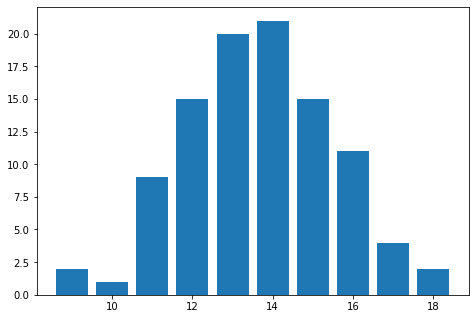

In [141]:
def plotDistribPorMedia(distribuicao):
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    Media=[]
    dist=[]
    for linha in distribuicao:
            Media.append(linha)
            dist.append(distribuicao[linha])
    ax.bar(Media,dist)
    plt.show()
plotDistribPorMedia(distribPorMedia(BDalunos))